<a href="https://colab.research.google.com/github/Aban6/Data-Visualization_LineCharts/blob/main/2022_CA_Summer_Demand_and_Renewables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#autosaving the notebook
%autosave 60

Autosaving every 60 seconds


In [2]:
#upload the file
from google.colab import files

# Choose a file from your local machine to upload
uploaded = files.upload()


Saving S2022_netLoadANDRenewables.csv to S2022_netLoadANDRenewables.csv


In [3]:
#read csv file and create a dataframe
import pandas as pd

# Replace 'your_file.csv' with the actual filename you uploaded
file_name = 'S2022_netLoadANDRenewables.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()
df.shape

(744, 17)

In [4]:
# Drop one or more columns by specifying their names
df = df.drop(['INTERVALSTARTTIME_GMT','INTERVALENDTIME_GMT', 'SLRS_TYPE', 'OPR_INTERVAL', 'MARKET_RUN_ID','TAC_ZONE_NAME','SCHEDULE','XML_DATA_ITEM','POS','MW','GROUP'], axis=1)


In [5]:
#fill na
df=df.fillna(0)
#shape
df.shape


(744, 6)

In [6]:
# Display the first few rows of the DataFrame
df.head()

,OPR_DT,OPR_HR,RE,Net MW,% RE,SRMER
0,8/1/2022,1,1464.85,23780.32,5.802496,422.335601
1,8/1/2022,2,1397.75,22569.04,5.832028,419.123205
2,8/1/2022,3,1217.16,21880.67,5.269586,414.058957
3,8/1/2022,4,1024.20,21662.30,4.514579,415.495087
4,8/1/2022,5,956.59,21978.69,4.170823,419.123205


In [7]:
# Assuming your DataFrame is already loaded with columns 'Date' and 'Hour'
# Combine 'Date' and 'Hour' columns into a single string column
df['Datetime_Str'] = df['OPR_DT'] + ' ' + df['OPR_HR'].astype(str)



# Apply the custom parser to create the adjusted datetime column
df['Datetime'] = df['Datetime_Str']


# Drop the temporary string column
df.drop(columns=['Datetime_Str'], inplace=True)



In [8]:
df.head()

,OPR_DT,OPR_HR,RE,Net MW,% RE,SRMER,Datetime
0,8/1/2022,1,1464.85,23780.32,5.802496,422.335601,8/1/2022 1
1,8/1/2022,2,1397.75,22569.04,5.832028,419.123205,8/1/2022 2
2,8/1/2022,3,1217.16,21880.67,5.269586,414.058957,8/1/2022 3
3,8/1/2022,4,1024.20,21662.30,4.514579,415.495087,8/1/2022 4
4,8/1/2022,5,956.59,21978.69,4.170823,419.123205,8/1/2022 5


In [9]:
# Check for missing data points (NaN) or zero values in the 'Hour' column
missing_data = df[df['Datetime'].isna() | (df['Datetime'] == 0)]
# Display the rows with missing data points
print(missing_data)

Empty DataFrame
Columns: [OPR_DT, OPR_HR, RE, Net MW, % RE, SRMER, Datetime]
Index: []


In [10]:
df.iloc[:, 3]

0      23780.32
1      22569.04
2      21880.67
3      21662.30
4      21978.69
         ...   
739    37295.83
740    35867.59
741    33320.30
742    30310.47
743    27574.34
Name: Net MW, Length: 744, dtype: float64

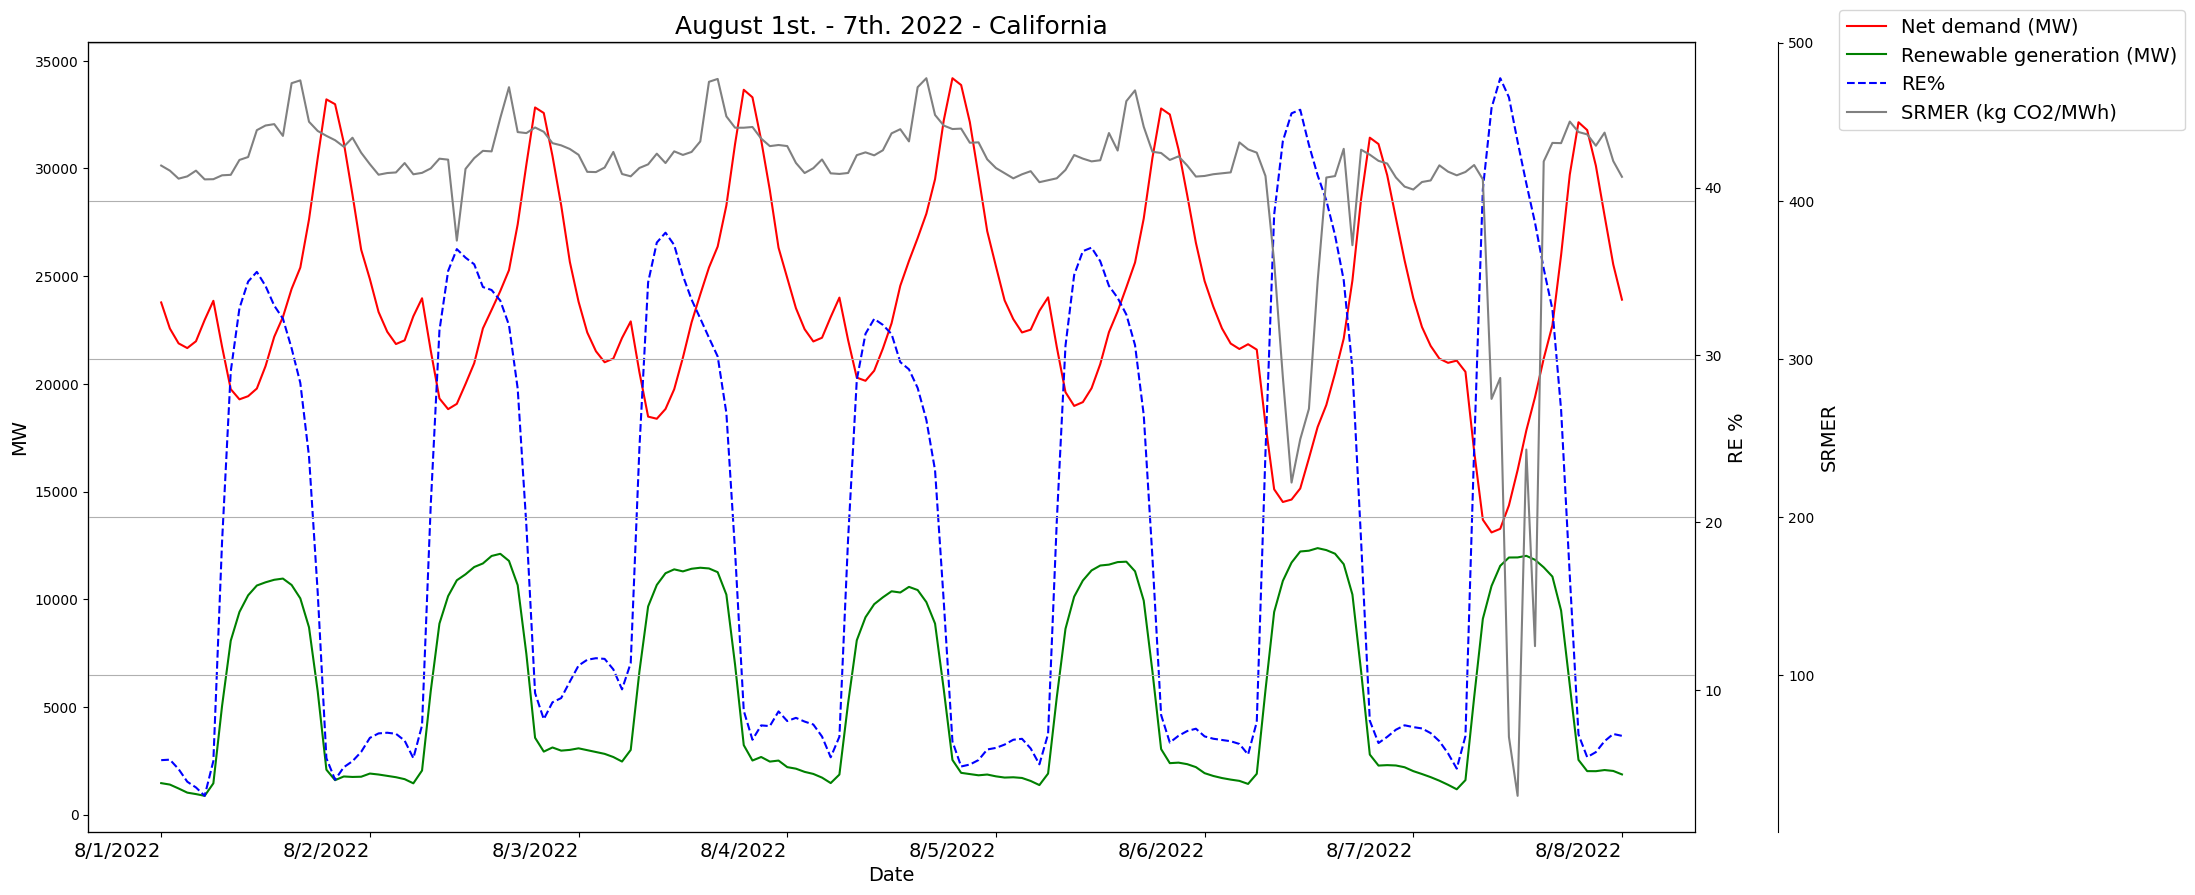

In [12]:
import matplotlib.pyplot as plt
df = df.head(169)
fig, ax1 = plt.subplots(figsize=(20, 9))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Move the third y-axis to the right
ax3.spines['right'].set_position(('outward', 60))

y1 = df.iloc[:, 3]
y2 = df.iloc[:, 2]
y3 = df.iloc[:, 4]
y4 = df.iloc[:, 5]
x = df['Datetime']

plt.title('August 1st. - 7th. 2022 - California',color='black', fontsize=18)
ax1.plot(x, y1, label = "Net demand (MW)", color = 'r' )
ax1.plot(x, y2, label = "Renewable generation (MW)", color = 'g')
ax2.plot(x, y3, label = "RE%",color = 'b',linestyle = 'dashed')
ax3.plot(x, y4, label="SRMER (kg CO2/MWh)", color='gray')  # Adjust color and linestyle as needed

ax1.set_ylabel("MW", color='black', fontsize=14)
ax2.set_ylabel("RE %", color='black', fontsize=14)
ax3.set_ylabel("SRMER", color='black', fontsize=14)  # Provide appropriate units


ax1.set_xlabel("Date", color='black', fontsize=14)

# Set custom x-ticks at every 24 points (once per day)
x_ticks = range(0, len(x), 24)  # Adjust the range based on your data density
x_tick_labels = [x[i].split()[0] for i in x_ticks]  # Extract corresponding date labels

# Rotate the x-tick labels for ax1
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels, fontsize=14, ha='right')

fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=14)

# Display the chart
plt.grid(True)
plt.tight_layout()

# Adjust the figure layout to accommodate the legend
plt.subplots_adjust(right=0.85)  # You can adjust the value as needed

plt.show()

fig.savefig('Cal Aug 2022')